In [5]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [6]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convert labels to categorical one-hot encoding
train_labels = to_categorical(train_labels, 10)  # 10 classes in CIFAR-10
test_labels = to_categorical(test_labels, 10)


In [22]:
train_images[0].shape

(32, 32, 3)

In [7]:
model = Sequential()

# Convolutional layer with 32 filters, 3x3 kernel, and relu activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))  # Max pooling layer

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

# Flatten the 3D output to 1D
model.add(Flatten())

# Dense layers for classification
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(10, activation='softmax'))  # 10 classes in CIFAR-10

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model architecture
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [8]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'Test accuracy: {test_acc * 100:.2f}%')


Epoch 1/10
782/782 [==============================] - 76s 94ms/step - loss: 1.7691 - accuracy: 0.3477 - val_loss: 1.3830 - val_accuracy: 0.4958
Epoch 2/10
782/782 [==============================] - 74s 95ms/step - loss: 1.4534 - accuracy: 0.4743 - val_loss: 1.3111 - val_accuracy: 0.5184
Epoch 3/10
782/782 [==============================] - 72s 92ms/step - loss: 1.3301 - accuracy: 0.5278 - val_loss: 1.1267 - val_accuracy: 0.5981
Epoch 4/10
782/782 [==============================] - 71s 90ms/step - loss: 1.2227 - accuracy: 0.5690 - val_loss: 1.0708 - val_accuracy: 0.6235
Epoch 5/10
782/782 [==============================] - 79s 101ms/step - loss: 1.1432 - accuracy: 0.6000 - val_loss: 1.2202 - val_accuracy: 0.5672
Epoch 6/10
782/782 [==============================] - 71s 91ms/step - loss: 1.0911 - accuracy: 0.6196 - val_loss: 1.0141 - val_accuracy: 0.6429
Epoch 7/10
782/782 [==============================] - 68s 88ms/step - loss: 1.0364 - accuracy: 0.6383 - val_loss: 0.9842 - val_accuracy

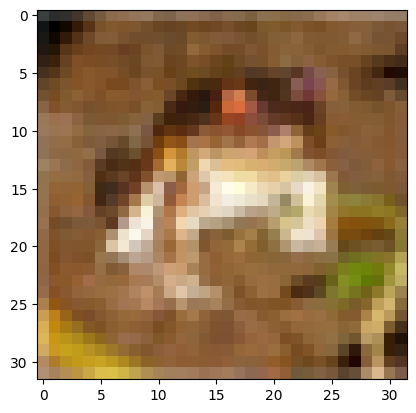

In [15]:
plt.imshow(train_images[0])

In [26]:
predicted = model.predict(np.expand_dims(train_images[0], axis=0))
np.argmax(predicted)

1/1 [==============================] - 0s 37ms/step


6

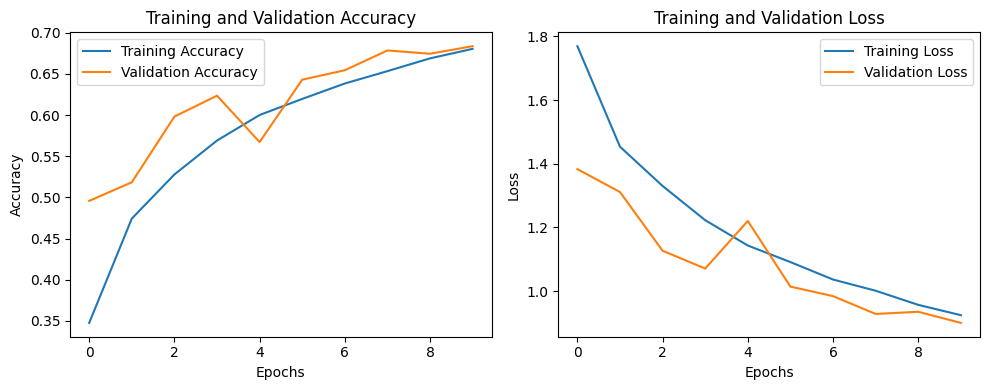

In [9]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
